In [1]:
%load_ext watermark
%watermark

Last updated: 2022-02-03T20:35:48.641623-05:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 5.4.0-48-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
url="https://raw.githubusercontent.com/manugarri/curso_data_science/master/Secciones/Seccion4.Analisis_y_procesado_de_datos/Procesado_de_Datos/data/vehiculos_original.csv"
vehiculos = pd.read_csv(url)
vehiculos.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [4]:
vehiculos=vehiculos.rename(columns={
                "cylinders":"cilindros",
                "trany":"transmision",
                "make":"fabricante",
                "model":"modelo",
                "displ":"desplazamiento", #volumen de desplazamiento del motor
                "drive":"traccion",
                "VClass":"clase",
                "fuelType":"combustible",
                "comb08":"consumo", #combined MPG for fuelType1
                "co2TailpipeGpm":"co2", # tailpipe CO2 in grams/mile
            })

In [5]:
vehiculos

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
...,...,...,...,...,...,...,...,...,...,...,...
38431,smart,fortwo electric drive coupe,2011,NaN,NaN,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,87,0.000000
38432,smart,fortwo electric drive coupe,2013,NaN,NaN,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000
38433,smart,fortwo electric drive coupe,2014,NaN,NaN,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000
38434,smart,fortwo electric drive coupe,2015,NaN,NaN,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000


In [6]:
vehiculos.dtypes

fabricante         object
modelo             object
year                int64
desplazamiento    float64
cilindros         float64
transmision        object
traccion           object
clase              object
combustible        object
consumo             int64
co2               float64
dtype: object

#### Descipcion de Entidades

fabricante
frabricante+modelo
fabricante+modelo+año
fabricante+año

In [7]:
vehiculos.to_csv("../Analisis_Exploratorio_Datos/vehiculos.1.procesado_inicial.csv", index = False)

In [8]:
vehiculos = pd.read_csv("../Analisis_Exploratorio_Datos/vehiculos.1.procesado_inicial.csv")

In [9]:
vehiculos.shape

(38436, 11)

#### Duplicados

In [10]:
vehiculos['modelo_unico'] = vehiculos.fabricante.str.cat([vehiculos.modelo,vehiculos.year.apply(str)], sep='-')

In [11]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985                24
Ford-F150 Pickup 2WD-1984                  19
Chevrolet-C10 Pickup 2WD-1984              19
GMC-C15 Pickup 2WD-1984                    19
Chevrolet-S10 Pickup 2WD-1984              18
                                           ..
Mercedes-Benz-S550-2010                     1
Porsche-Cayenne GTS-2014                    1
Volvo-XC90 AWD-2013                         1
Mercedes-Benz-ML350 Bluetec 4matic-2014     1
Mercedes-Benz-SL600-1994                    1
Name: modelo_unico, Length: 17448, dtype: int64

In [12]:
vehiculos[vehiculos.modelo_unico=='Chevrolet-S10 Pickup 2WD-1984'].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
7243,Chevrolet,S10 Pickup 2WD,1984,2.0,4.0,Manual 4-spd,2-Wheel Drive,Small Pickup Trucks 2WD,Regular,24,370.291667,Chevrolet-S10 Pickup 2WD-1984
7244,Chevrolet,S10 Pickup 2WD,1984,2.0,4.0,Manual 5-spd,2-Wheel Drive,Small Pickup Trucks 2WD,Regular,26,341.807692,Chevrolet-S10 Pickup 2WD-1984
7245,Chevrolet,S10 Pickup 2WD,1984,2.0,4.0,Automatic 4-spd,2-Wheel Drive,Small Pickup Trucks 2WD,Regular,20,444.350000,Chevrolet-S10 Pickup 2WD-1984
7246,Chevrolet,S10 Pickup 2WD,1984,2.0,4.0,Manual 4-spd,2-Wheel Drive,Small Pickup Trucks 2WD,Regular,21,423.190476,Chevrolet-S10 Pickup 2WD-1984
7247,Chevrolet,S10 Pickup 2WD,1984,2.0,4.0,Manual 5-spd,2-Wheel Drive,Small Pickup Trucks 2WD,Regular,22,403.954545,Chevrolet-S10 Pickup 2WD-1984


In [14]:
vehiculos[vehiculos.duplicated()].shape

(1506, 12)

In [15]:
vehiculos=vehiculos.drop_duplicates() # eliminamos valores duplicados
vehiculos.shape

(36930, 12)

In [16]:
del vehiculos['modelo_unico'] #eliminamos columna de modelo_unico

In [17]:
n_records = len(vehiculos)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))

valores_duplicados_col(vehiculos)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.353-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


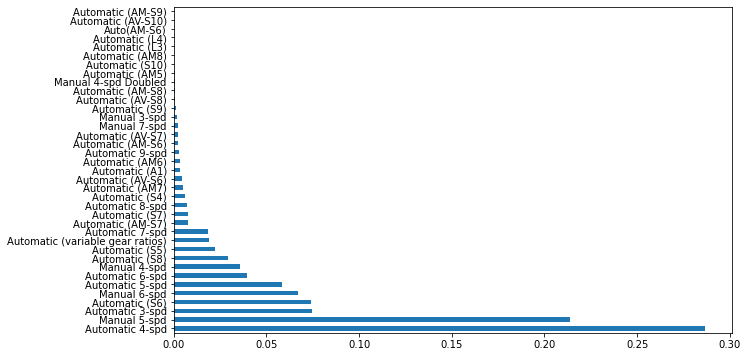

In [19]:
vehiculos.transmision.value_counts(normalize=True).plot.barh();

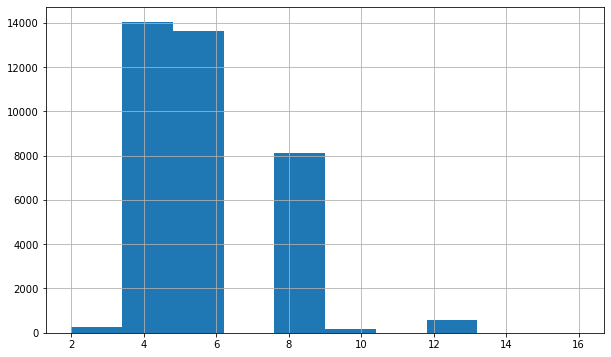

In [21]:
vehiculos.cilindros.hist();

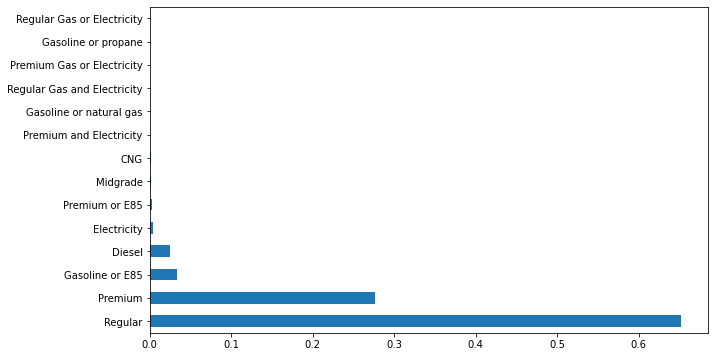

In [22]:
vehiculos.combustible.value_counts(normalize=True).plot.barh();

In [23]:
# la columna combustible si puede tener un problema al tener el 65% de los casos de gasolina regular

#### Valores Inexistentes

In [25]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)


fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


#Vemos que campo traccion, cilindros y transmision tienen valores inexistentes. Sin embargo son cantidades despreciables (maximo es la variable traccion con un 3% inexistente)

#### Valores Extremos (outliers)

In [26]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


<ipython-input-26-5e5c37a4d9d6>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


In [27]:
# Vemos que las variables de consumo y co2 tienen outliers. Podemos hacer un boxplot para visualizar esto mejor

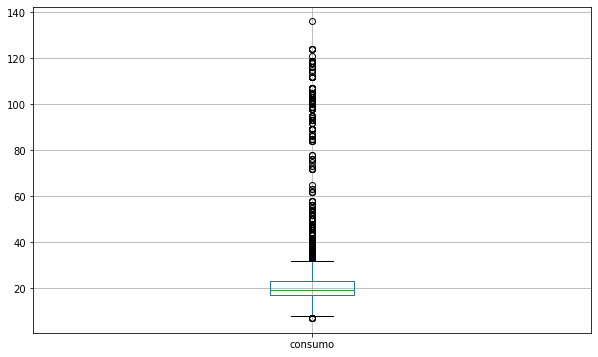

In [28]:
vehiculos.boxplot(column='consumo');

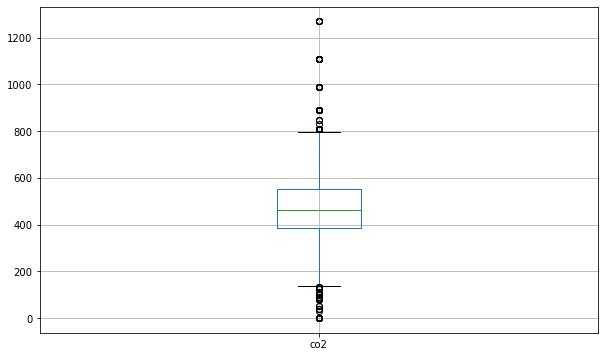

In [29]:
vehiculos.boxplot(column='co2');

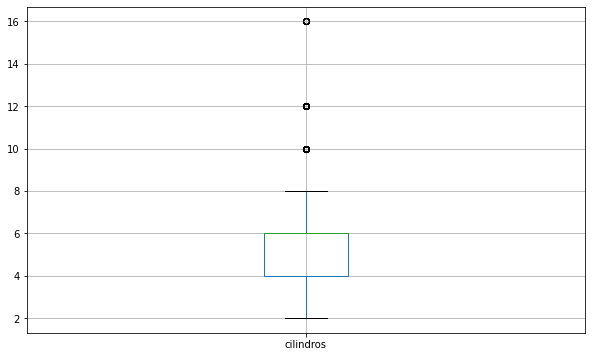

In [30]:
vehiculos.boxplot(column='cilindros');

In [31]:
vehiculos[vehiculos.co2==0].combustible.unique()

array(['Electricity'], dtype=object)

In [32]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [33]:
vehiculos_no_electricos=vehiculos[vehiculos.co2>0]

In [34]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


<ipython-input-26-5e5c37a4d9d6>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


In [35]:
valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


In [37]:
vehiculos_no_electricos.to_csv('../Analisis_Exploratorio_Datos/vehiculos.2.limpio_analisis.csv',index=False)